In [1]:
import numpy as np
import pandas as pd
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
df = pd.read_csv('antihyperglycemia.csv')

In [3]:
df.head()

,Number,Name_Thai,Name_Sci,Name_Short,Emax_amylase_2.75mcgml,Emax_glucosidase_0.67mcgml,IC50_amylase,IC50_glucosidase,Bioactivity_class_amylase,Bioactivity_class_glucosidase,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones
0,1,_____,Garcinia_cowa_Roxb_ex_DC,G_cowa,99.6,51.1,0.13,0.63,active,active,0,0,0,0,0,2,2,2
1,2,_________,Polyalthia_debilis_(Pierre)_Finet &_Gapnep.,P_debilis,99.5,50.0,0.14,0.72,active,active,3,0,0,5,3,0,0,0
2,3,______(__),Polyalthia_evecta_(Pierre)_Finet _Gapnep_leaf,P_evecta_leaf,93.9,52.0,0.14,0.57,active,active,0,0,0,3,0,3,2,0
3,4,______(Rhizome),Polyalthia_evecta_(Pierre)_Finet_&_Gapnep_Rhai...,P_evecta_Rhizome,35.8,50.6,NaN,0.63,inactive,active,3,0,0,5,3,0,0,5
4,5,__________,Erythroxylum_cuneatum_(Miq)_Kurz,E_cuneatum,86.5,39.6,0.17,NaN,active,inactive,3,0,0,2,0,3,3,0


In [4]:
df = df.drop(['Number', 'Name_Thai'], axis=1)
df.head()

,Name_Sci,Name_Short,Emax_amylase_2.75mcgml,Emax_glucosidase_0.67mcgml,IC50_amylase,IC50_glucosidase,Bioactivity_class_amylase,Bioactivity_class_glucosidase,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones
0,Garcinia_cowa_Roxb_ex_DC,G_cowa,99.6,51.1,0.13,0.63,active,active,0,0,0,0,0,2,2,2
1,Polyalthia_debilis_(Pierre)_Finet &_Gapnep.,P_debilis,99.5,50.0,0.14,0.72,active,active,3,0,0,5,3,0,0,0
2,Polyalthia_evecta_(Pierre)_Finet _Gapnep_leaf,P_evecta_leaf,93.9,52.0,0.14,0.57,active,active,0,0,0,3,0,3,2,0
3,Polyalthia_evecta_(Pierre)_Finet_&_Gapnep_Rhai...,P_evecta_Rhizome,35.8,50.6,NaN,0.63,inactive,active,3,0,0,5,3,0,0,5
4,Erythroxylum_cuneatum_(Miq)_Kurz,E_cuneatum,86.5,39.6,0.17,NaN,active,inactive,3,0,0,2,0,3,3,0


In [5]:
df =df.rename(columns={'Emax_amylase_2.75mcgml' : 'Emax_amylase', 'Emax_glucosidase_0.67mcgml' : 'Emax_glucosidase'})

In [6]:
from scipy.stats import pearsonr
rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))
Res_pearson_sig = rho.round(3).astype(str) + p
Res_pearson_sig.to_csv('Res_pearson_sig.csv')
Res_pearson_sig

/Users/tarapongsrisongkram/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


,Emax_amylase,Emax_glucosidase,IC50_amylase,IC50_glucosidase,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones
Emax_amylase,1.0***,0.195,-0.618*,0.686,-0.108,0.174,0.135,0.143,-0.257,-0.221,-0.042,-0.113
Emax_glucosidase,0.195,1.0***,-0.404,-0.887**,0.248,0.038,0.049,0.353,0.363*,-0.384*,0.454*,0.099
IC50_amylase,-0.618*,-0.404,1.0***,0.312,0.499,0.154,0.44,-0.269,0.016,0.095,-0.156,-0.107
IC50_glucosidase,0.686,-0.887**,0.312,1.0***,-0.163,nan,nan,0.26,-0.163,-0.737*,-0.541,0.216
Alkaloids,-0.108,0.248,0.499,-0.163,1.0***,0.179,0.384*,-0.015,0.205,-0.136,0.109,0.074
Antaquinones,0.174,0.038,0.154,nan,0.179,1.0***,-0.033,0.085,0.31,-0.077,0.158,-0.075
Carotenoids,0.135,0.049,0.44,nan,0.384*,-0.033,1.0***,-0.054,-0.108,0.049,-0.168,-0.075
flavonoids,0.143,0.353,-0.269,0.26,-0.015,0.085,-0.054,1.0***,0.5**,-0.396*,-0.14,0.142
Reducing_sugars,-0.257,0.363*,0.016,-0.163,0.205,0.31,-0.108,0.5**,1.0***,-0.3,0.18,0.005
Saponins,-0.221,-0.384*,0.095,-0.737*,-0.136,-0.077,0.049,-0.396*,-0.3,1.0***,-0.111,-0.292


In [7]:
pval.to_csv('Res_pearson_pval.csv')
pval

,Emax_amylase,Emax_glucosidase,IC50_amylase,IC50_glucosidase,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones
Emax_amylase,0.000000,0.294319,0.024408,0.060127,0.563566,0.350069,0.469789,0.444169,0.163359,0.233015,0.821117,0.545734
Emax_glucosidase,0.294319,0.000000,0.171259,0.003273,0.179371,0.838271,0.793906,0.051649,0.044977,0.032828,0.010216,0.595781
IC50_amylase,0.024408,0.171259,0.000000,0.608721,0.082275,0.615258,0.132207,0.375012,0.957963,0.756830,0.611806,0.729077
IC50_glucosidase,0.060127,0.003273,0.608721,0.000000,0.699666,NaN,NaN,0.533400,0.699666,0.036879,0.166237,0.608090
Alkaloids,0.563566,0.179371,0.082275,0.699666,0.000000,0.335497,0.032769,0.935434,0.269303,0.464756,0.558941,0.692475
Antaquinones,0.350069,0.838271,0.615258,NaN,0.335497,0.000000,0.858712,0.648231,0.090133,0.680284,0.397177,0.689170
Carotenoids,0.469789,0.793906,0.132207,NaN,0.032769,0.858712,0.000000,0.773482,0.564236,0.794845,0.366043,0.689170
flavonoids,0.444169,0.051649,0.375012,0.533400,0.935434,0.648231,0.773482,0.000000,0.004154,0.027647,0.452305,0.445676
Reducing_sugars,0.163359,0.044977,0.957963,0.699666,0.269303,0.090133,0.564236,0.004154,0.000000,0.101395,0.331769,0.979684
Saponins,0.233015,0.032828,0.756830,0.036879,0.464756,0.680284,0.794845,0.027647,0.101395,0.000000,0.551396,0.111212


In [8]:
Res_pearson = df.corr(method='pearson').round(3)
Res_pearson.to_csv('Res_pearson.csv')
Res_pearson

,Emax_amylase,Emax_glucosidase,IC50_amylase,IC50_glucosidase,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones
Emax_amylase,1.000,0.195,-0.618,0.686,-0.108,0.174,0.135,0.143,-0.257,-0.221,-0.042,-0.113
Emax_glucosidase,0.195,1.000,-0.404,-0.887,0.248,0.038,0.049,0.353,0.363,-0.384,0.454,0.099
IC50_amylase,-0.618,-0.404,1.000,0.312,0.499,0.154,0.440,-0.269,0.016,0.095,-0.156,-0.107
IC50_glucosidase,0.686,-0.887,0.312,1.000,-0.163,NaN,NaN,0.260,-0.163,-0.737,-0.541,0.216
Alkaloids,-0.108,0.248,0.499,-0.163,1.000,0.179,0.384,-0.015,0.205,-0.136,0.109,0.074
Antaquinones,0.174,0.038,0.154,NaN,0.179,1.000,-0.033,0.085,0.310,-0.077,0.158,-0.075
Carotenoids,0.135,0.049,0.440,NaN,0.384,-0.033,1.000,-0.054,-0.108,0.049,-0.168,-0.075
flavonoids,0.143,0.353,-0.269,0.260,-0.015,0.085,-0.054,1.000,0.500,-0.396,-0.140,0.142
Reducing_sugars,-0.257,0.363,0.016,-0.163,0.205,0.310,-0.108,0.500,1.000,-0.300,0.180,0.005
Saponins,-0.221,-0.384,0.095,-0.737,-0.136,-0.077,0.049,-0.396,-0.300,1.000,-0.111,-0.292


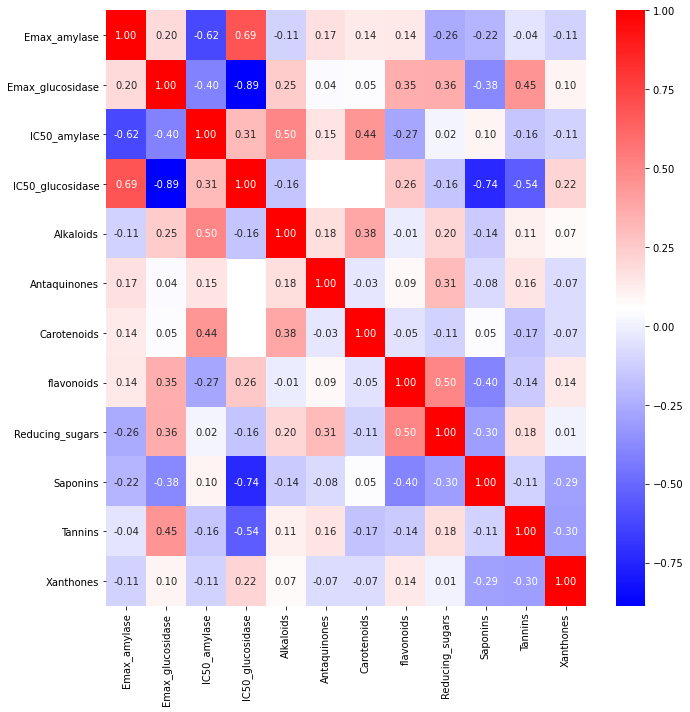

In [9]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(Res_pearson, annot=True, cmap='bwr', fmt='.2f')
plt.tight_layout()
plt.savefig('corr_pearson_number.pdf', dpi=300)

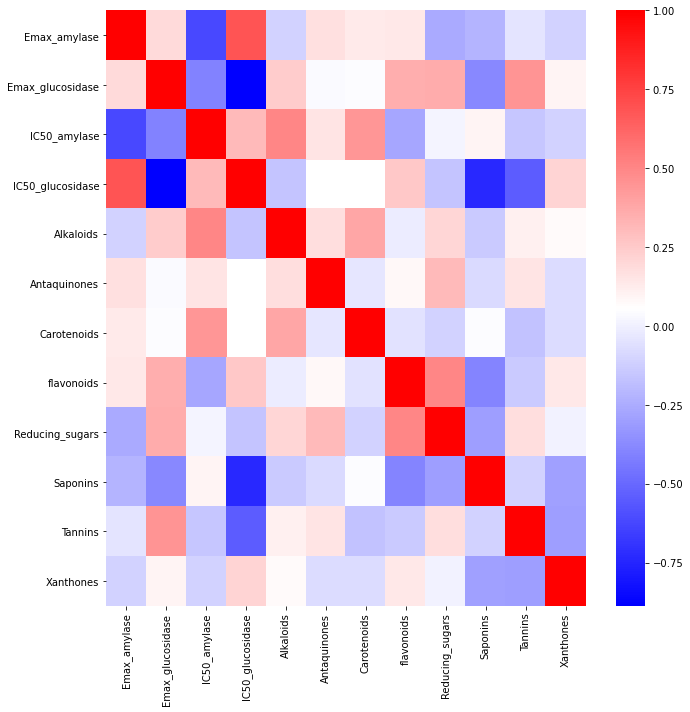

In [10]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(Res_pearson, annot=False, cmap='bwr', fmt='.2f')
plt.tight_layout()
plt.savefig('corr_pearson_no_number.pdf', dpi=300)

In [11]:
df1 = df.set_index(['Name_Short'])
df2 = df1.drop(['Name_Sci'], axis=1)

In [12]:
df2.to_csv('df_clean.csv')

In [13]:
rho

,Emax_amylase,Emax_glucosidase,IC50_amylase,IC50_glucosidase,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones
Emax_amylase,1.000000,0.194538,-0.617910,0.686359,-0.107861,0.173690,0.134767,0.142584,-0.256676,-0.220617,-0.042332,-0.112799
Emax_glucosidase,0.194538,1.000000,-0.403751,-0.887413,0.247555,0.038215,0.048902,0.352690,0.362625,-0.384248,0.454470,0.099114
IC50_amylase,-0.617910,-0.403751,1.000000,0.312472,0.499421,0.154079,0.440225,-0.268538,0.016256,0.095286,-0.155567,-0.106520
IC50_glucosidase,0.686359,-0.887413,0.312472,1.000000,-0.163045,NaN,NaN,0.260383,-0.163045,-0.737259,-0.540931,0.215608
Alkaloids,-0.107861,0.247555,0.499421,-0.163045,1.000000,0.178930,0.384367,-0.015173,0.204707,-0.136284,0.109134,0.073976
Antaquinones,0.173690,0.038215,0.154079,NaN,0.178930,1.000000,-0.033333,0.085295,0.309570,-0.077068,0.157589,-0.074812
Carotenoids,0.134767,0.048902,0.440225,NaN,0.384367,-0.033333,1.000000,-0.053871,-0.107676,0.048674,-0.168095,-0.074812
flavonoids,0.142584,0.352690,-0.268538,0.260383,-0.015173,0.085295,-0.053871,1.000000,0.500302,-0.395504,-0.140076,0.142118
Reducing_sugars,-0.256676,0.362625,0.016256,-0.163045,0.204707,0.309570,-0.107676,0.500302,1.000000,-0.299725,0.180292,0.004770
Saponins,-0.220617,-0.384248,0.095286,-0.737259,-0.136284,-0.077068,0.048674,-0.395504,-0.299725,1.000000,-0.111223,-0.291795


In [14]:
#convert matrix to list of edges and rename the columns
edges = rho.stack().reset_index()
edges.columns = ['Features_1','Features_2','correlation']

In [15]:
#remove self correlations
edges = edges.loc[edges['Features_1'] != edges['Features_2']].copy()

In [16]:
edges

,Features_1,Features_2,correlation
1,Emax_amylase,Emax_glucosidase,0.194538
2,Emax_amylase,IC50_amylase,-0.617910
3,Emax_amylase,IC50_glucosidase,0.686359
4,Emax_amylase,Alkaloids,-0.107861
5,Emax_amylase,Antaquinones,0.173690
...,...,...,...
134,Xanthones,Carotenoids,-0.074812
135,Xanthones,flavonoids,0.142118
136,Xanthones,Reducing_sugars,0.004770
137,Xanthones,Saponins,-0.291795


In [17]:
edges.isnull().sum()

Features_1     0
Features_2     0
correlation    0
dtype: int64

In [18]:
#create undirected graph with weights corresponding to the correlation magnitude
G0 = nx.from_pandas_edgelist(edges, 'Features_1', 'Features_2', edge_attr=['correlation'])

#print out the graph info
#check number of nodes and degrees are as expected (all should have degree = 38, i.e. average degree = 38)
print(nx.info(G0))

Graph with 12 nodes and 64 edges


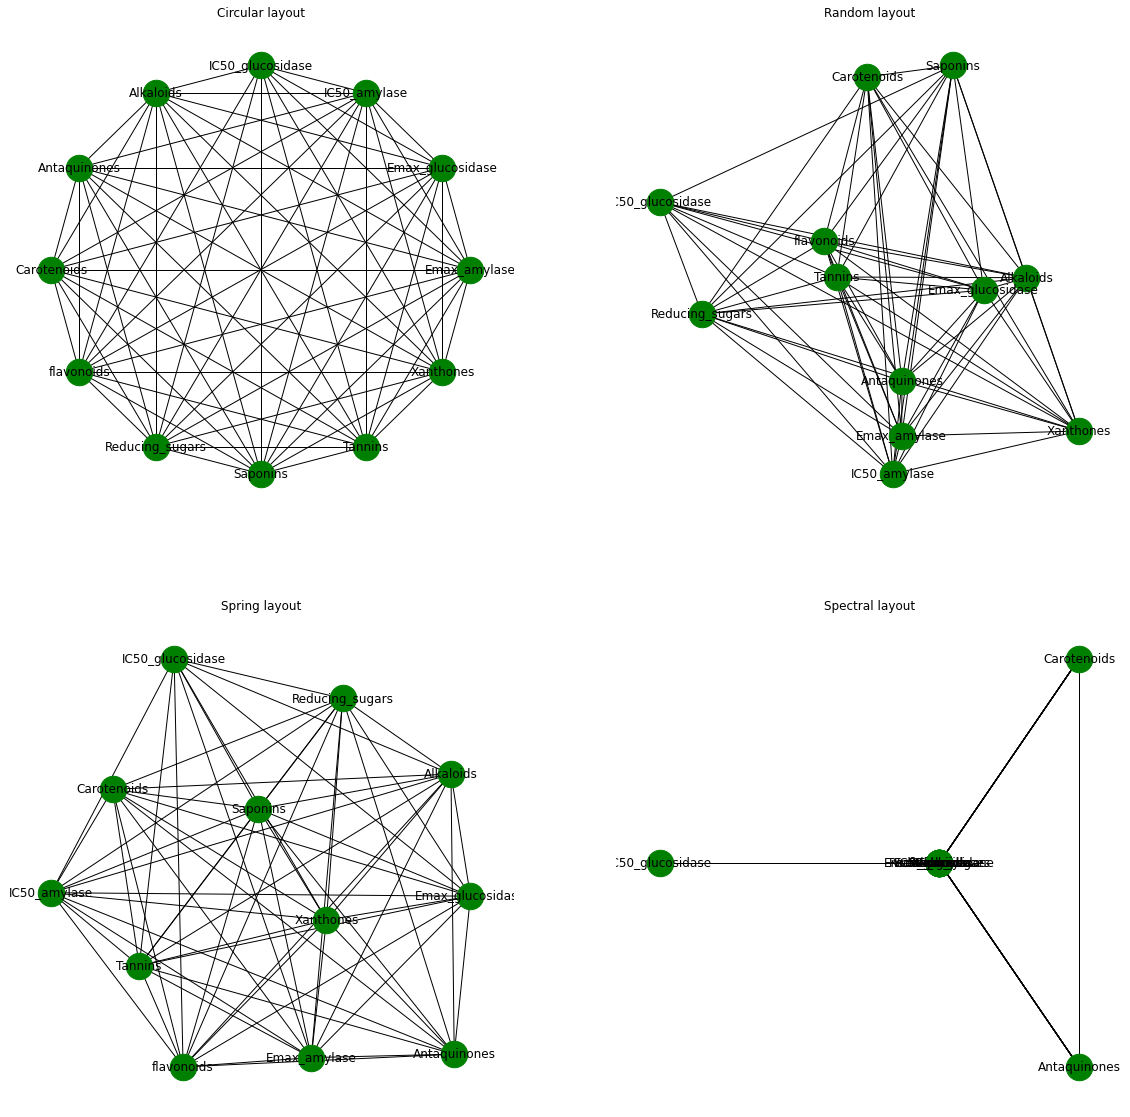

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(20,20))

nx.draw(G0, with_labels=True, node_size=700, node_color="green",
        edge_color='black',  pos=nx.circular_layout(G0),ax=ax[0,0])
ax[0,0].set_title("Circular layout")

nx.draw(G0, with_labels=True, node_size=700, node_color="green",
        edge_color='black',  pos=nx.random_layout(G0),ax=ax[0,1])
ax[0,1].set_title("Random layout")

nx.draw(G0, with_labels=True, node_size=700, node_color="green",
        edge_color='black',  pos=nx.spring_layout(G0),ax=ax[1,0])
ax[1,0].set_title("Spring layout")

nx.draw(G0, with_labels=True, node_size=700, node_color="green",
        edge_color='black',  pos=nx.spectral_layout(G0),ax=ax[1,1])
ax[1,1].set_title("Spectral layout")

plt.show()

In [72]:
def assign_colour(correlation):
    if correlation <= 0:
        return "#FF0000"  # red
    else:
        return "#0000FF"  # blue

def assign_thickness(correlation, benchmark_thickness=1, scaling_factor=10):
    return benchmark_thickness * abs(correlation)*scaling_factor

def assign_node_size(degree, scaling_factor=100):
    return degree * scaling_factor


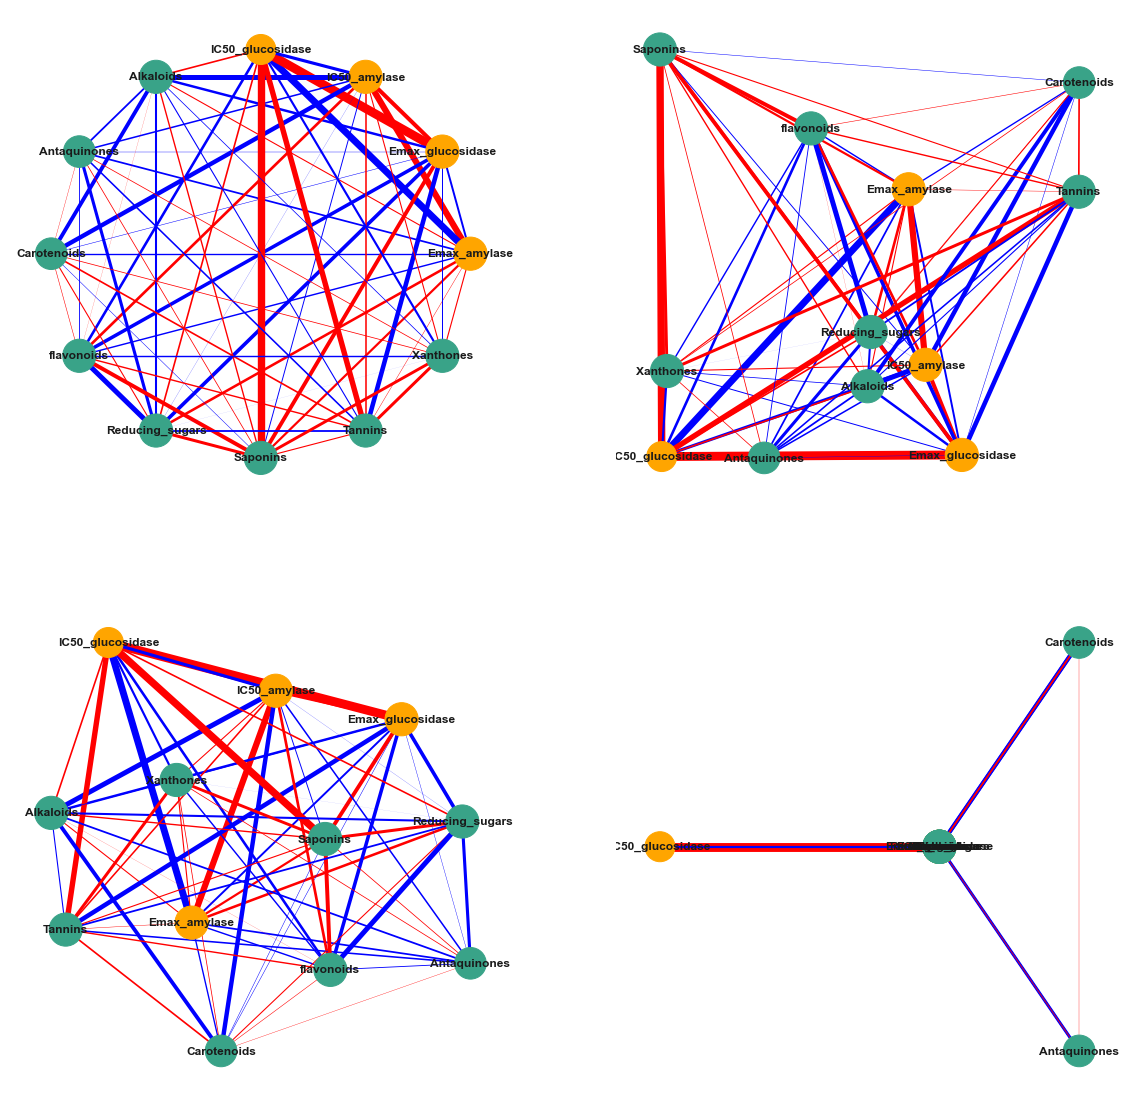

In [73]:
edge_colors_0 = []
edge_width_0 = []
for key, value in nx.get_edge_attributes(G0, 'correlation').items():
    edge_colors_0.append(assign_colour(value))
    edge_width_0.append(assign_thickness(value))

# assign node size depending on number of connections (degree)
node_size_0 = []
for key, value in dict(G0.degree).items():
    node_size_0.append(assign_node_size(value))
    
color_map_0 = []
for node in G0:
    if node in {'Emax_amylase', 'Emax_glucosidase', 'IC50_amylase', 'IC50_glucosidase'}:
        color_map_0.append('orange')
    else: 
        color_map_0.append('#39A388') 
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(20,20))
nx.draw(G0, with_labels=True, node_size=node_size_0, node_color=color_map_0, width=edge_width_0,
        edge_color=edge_colors_0,  pos=nx.circular_layout(G0), font_weight = 'bold', ax=ax[0,0])
nx.draw(G0, with_labels=True, node_size=node_size_0, node_color=color_map_0, width=edge_width_0,
        edge_color=edge_colors_0,  pos=nx.random_layout(G0), font_weight = 'bold', ax=ax[0,1])
nx.draw(G0, with_labels=True, node_size=node_size_0, node_color=color_map_0, width=edge_width_0,
        edge_color=edge_colors_0,  pos=nx.spring_layout(G0), font_weight = 'bold', ax=ax[1,0])
nx.draw(G0, with_labels=True, node_size=node_size_0, node_color=color_map_0, width=edge_width_0,
        edge_color=edge_colors_0,  pos=nx.spectral_layout(G0), font_weight = 'bold', ax=ax[1,1])
plt.show()

In [74]:
# 'winner takes all' method - set minium correlation threshold to remove some edges from the diagram
threshold = 0.3

# create a new graph from edge list
Gx = nx.from_pandas_edgelist(edges, 'Features_1', 'Features_2', edge_attr=['correlation'])

# list to store edges to remove
remove = []
# loop through edges in Gx and find correlations which are below the threshold
for Features_1, Features_2 in Gx.edges():
    corr = Gx[Features_1][Features_2]['correlation']
    #add to remove node list if abs(corr) < threshold
    if abs(corr) < threshold:
        remove.append((Features_1, Features_2))

# remove edges contained in the remove list
Gx.remove_edges_from(remove)

print(str(len(remove)) + " edges removed")

# assign colours to edges depending on positive or negative correlation
# assign edge thickness depending on magnitude of correlation
edge_colours = []
edge_width = []
for key, value in nx.get_edge_attributes(Gx, 'correlation').items():
    edge_colours.append(assign_colour(value))
    edge_width.append(assign_thickness(value))

# assign node size depending on number of connections (degree)
node_size = []
for key, value in dict(Gx.degree).items():
    node_size.append(assign_node_size(value))
    
color_map = []
for node in Gx:
    if node in {'Emax_amylase', 'Emax_glucosidase', 'IC50_amylase', 'IC50_glucosidase'}:
        color_map.append('orange')
    else: 
        color_map.append('#39A388') 

46 edges removed


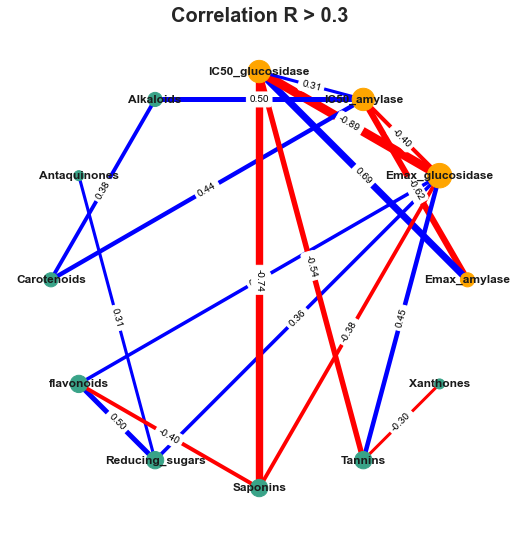

In [75]:
# draw improved graph
sns.set(rc={'figure.figsize': (7, 7)})

nx.draw(Gx, pos=nx.circular_layout(Gx), with_labels=True,
        node_size=node_size, node_color=color_map, edge_color=edge_colours, width=edge_width,
        font_size=12, font_weight = 'bold')

#edge_labels = nx.get_edge_attributes(Gx,'correlation') # key is edge, pls check for your case

edge_labels = dict([((n1, n2), f"{d['correlation']:.2f}")
                    for n1, n2, d in Gx.edges(data=True)])


nx.draw_networkx_edge_labels(Gx, pos=nx.circular_layout(Gx), edge_labels=edge_labels,
                             font_color='black', font_size=10)


plt.title("Correlation R > 0.3", fontsize='20', weight = 'bold')
plt.savefig('corr_pearson_net.pdf', dpi=300)
plt.show()

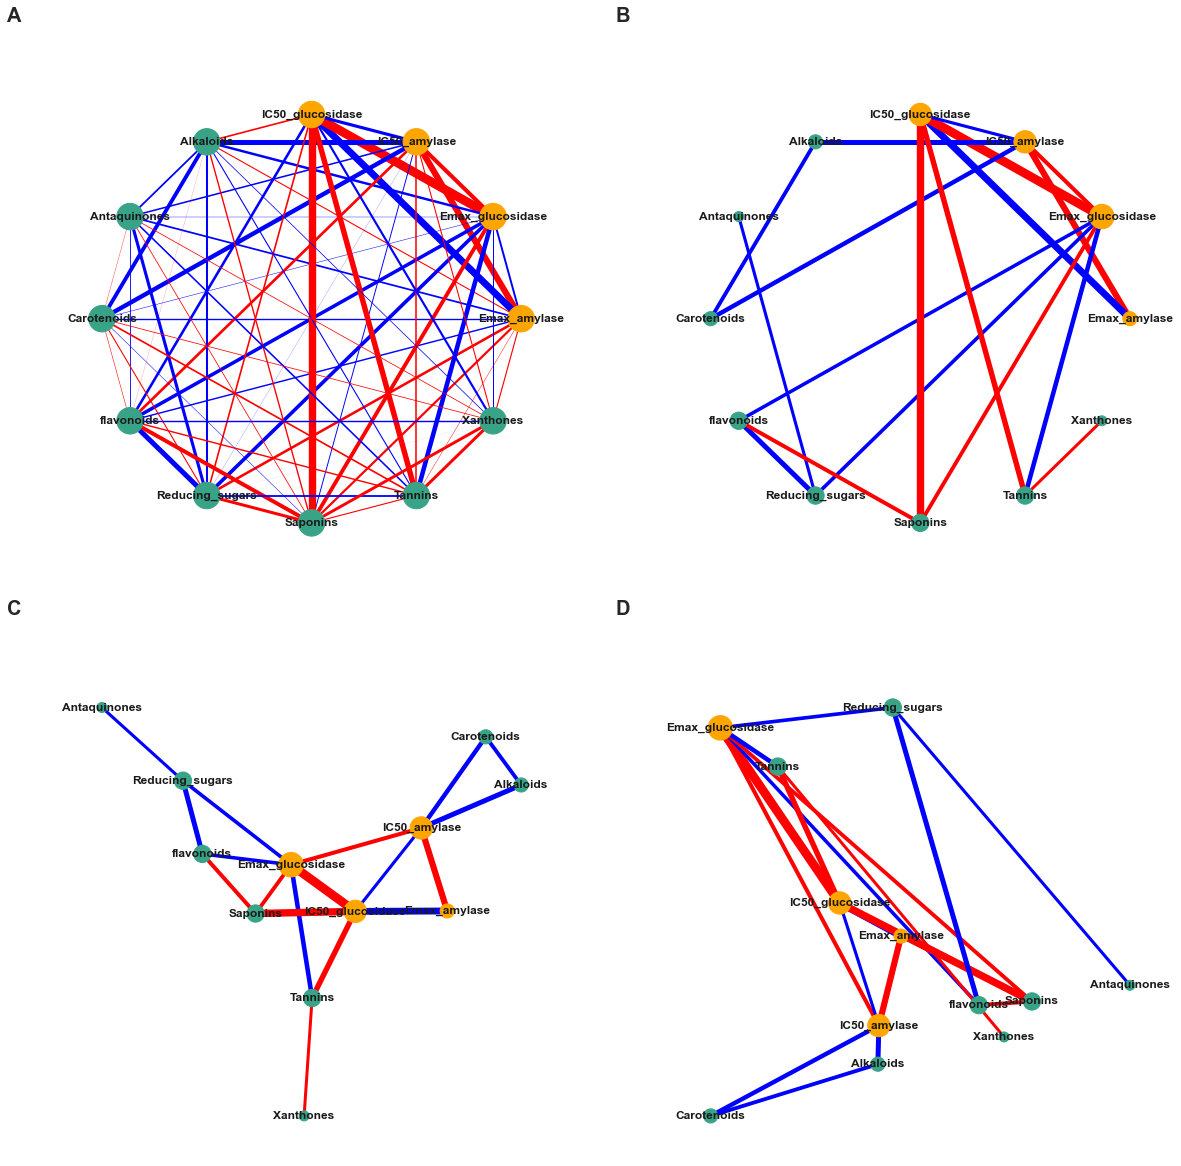

In [76]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(20,20))

texts = ['A', 'B', 'C', 'D']
axes = fig.get_axes()
for a,l in zip(axes, texts):
    a.annotate(l, xy=(-0.1, 1.1), xycoords="axes fraction", fontsize=20, weight = 'bold')

    
edge_labels = dict([((n1, n2), f"{d['correlation']:.2f}")
                    for n1, n2, d in Gx.edges(data=True)])
    

nx.draw(G0, with_labels=True, node_size=700, node_color=color_map, width=edge_width_0,
        edge_color=edge_colors_0,  pos=nx.circular_layout(G0),ax=ax[0,0], font_weight = 'bold')
#ax[0,0].set_title("Correlation analysis", fontsize=20, weight = 'bold')
nx.draw(Gx, with_labels=True, node_size=node_size, width=edge_width, node_color=color_map,
        edge_color=edge_colours,  pos=nx.circular_layout(Gx),ax=ax[0,1], font_weight = 'bold')
#ax[0,1].set_title("Pearson correlation > 0.3", fontsize=20, weight = 'bold')

nx.draw(Gx, with_labels=True, node_size=node_size, width=edge_width, node_color=color_map,
        edge_color=edge_colours,  pos=nx.spring_layout(Gx),ax=ax[1,0], font_weight = 'bold')
#ax[1,0].set_title("Pearson correlation > 0.3", fontsize=20, weight = 'bold')


nx.draw(Gx, with_labels=True, node_size=node_size, width=edge_width, node_color=color_map,
        edge_color=edge_colours,  pos=nx.random_layout(Gx),ax=ax[1,1], font_weight = 'bold')
#ax[1,1].set_title("Pearson correlation > 0.3", fontsize=20, weight = 'bold')

plt.savefig('Corr_network.pdf', dpi=300)
plt.show()

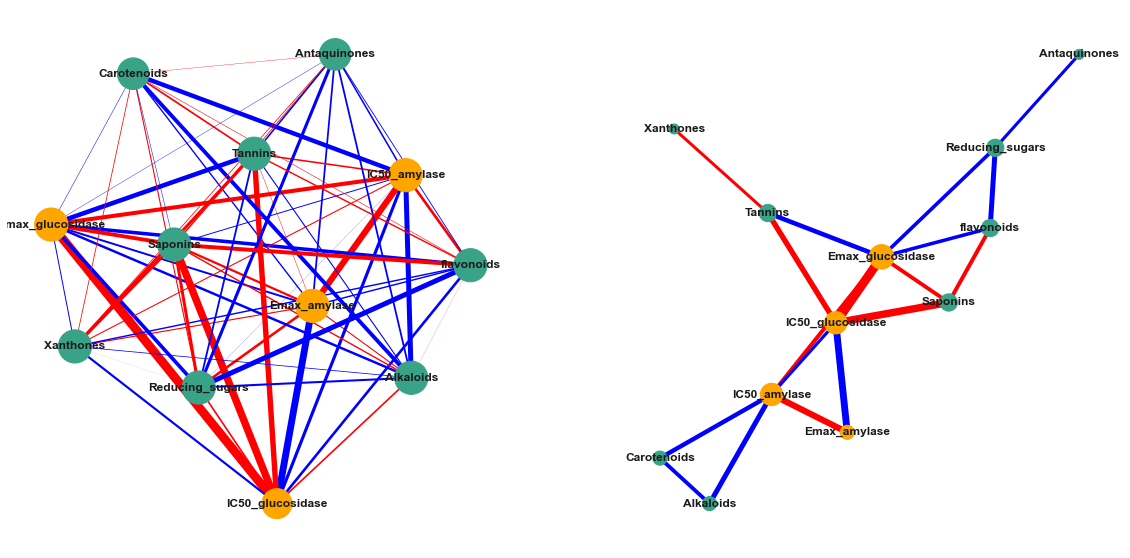

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,10))

nx.draw(G0, with_labels=True, node_size=node_size_0,  node_color=color_map_0, edge_color=edge_colors_0, width=edge_width_0, pos=nx.spring_layout(G0), ax=ax[0], font_weight='bold')
nx.draw(Gx, with_labels=True, node_size=node_size,  node_color=color_map, edge_color=edge_colours, width=edge_width, pos=nx.spring_layout(Gx), ax=ax[1], font_weight='bold')

plt.savefig('Network_phytochemical.pdf', dpi=300)
plt.show()

In [78]:
pval
#convert matrix to list of edges and rename the columns
sig = pval.stack().reset_index()
sig.columns = ['Features_1','Features_2','P']
#remove self correlations
sig = sig.loc[sig['Features_1'] != sig['Features_2']].copy()

In [79]:
sig

,Features_1,Features_2,P
1,Emax_amylase,Emax_glucosidase,0.294319
2,Emax_amylase,IC50_amylase,0.024408
3,Emax_amylase,IC50_glucosidase,0.060127
4,Emax_amylase,Alkaloids,0.563566
5,Emax_amylase,Antaquinones,0.350069
...,...,...,...
134,Xanthones,Carotenoids,0.689170
135,Xanthones,flavonoids,0.445676
136,Xanthones,Reducing_sugars,0.979684
137,Xanthones,Saponins,0.111212


In [80]:
Edges = pd.concat([sig, edges['correlation']], axis=1)
Edges = Edges.drop(Edges[Edges.P > 0.05].index)
Edges

,Features_1,Features_2,P,correlation
2,Emax_amylase,IC50_amylase,0.024408,-0.617910
15,Emax_glucosidase,IC50_glucosidase,0.003273,-0.887413
20,Emax_glucosidase,Reducing_sugars,0.044977,0.362625
21,Emax_glucosidase,Saponins,0.032828,-0.384248
22,Emax_glucosidase,Tannins,0.010216,0.454470
24,IC50_amylase,Emax_amylase,0.024408,-0.617910
37,IC50_glucosidase,Emax_glucosidase,0.003273,-0.887413
43,IC50_glucosidase,Saponins,0.036879,-0.737259
52,Alkaloids,Carotenoids,0.032769,0.384367
72,Carotenoids,Alkaloids,0.032769,0.384367


In [87]:
# 'winner takes all' method - set minium correlation threshold to remove some edges from the diagram
threshold = 0.3

# create a new graph from edge list
Gx = nx.from_pandas_edgelist(Edges, 'Features_1', 'Features_2', edge_attr=['correlation'])

# list to store edges to remove
remove = []
# loop through edges in Gx and find correlations which are below the threshold
for Features_1, Features_2 in Gx.edges():
    corr = Gx[Features_1][Features_2]['correlation']
    #add to remove node list if abs(corr) < threshold
    if abs(corr) < threshold:
        remove.append((Features_1, Features_2))

# remove edges contained in the remove list
Gx.remove_edges_from(remove)

print(str(len(remove)) + " edges removed")

# assign colours to edges depending on positive or negative correlation
# assign edge thickness depending on magnitude of correlation
edge_colours = []
edge_width = []
for key, value in nx.get_edge_attributes(Gx, 'correlation').items():
    edge_colours.append(assign_colour(value))
    edge_width.append(assign_thickness(value))

# assign node size depending on number of connections (degree)
node_size = []
for key, value in dict(Gx.degree).items():
    node_size.append(assign_node_size(value)*2)
    
color_map = []
for node in Gx:
    if node in {'Emax_amylase', 'Emax_glucosidase', 'IC50_amylase', 'IC50_glucosidase'}:
        color_map.append('orange')
    else: 
        color_map.append('#39A388') 

0 edges removed


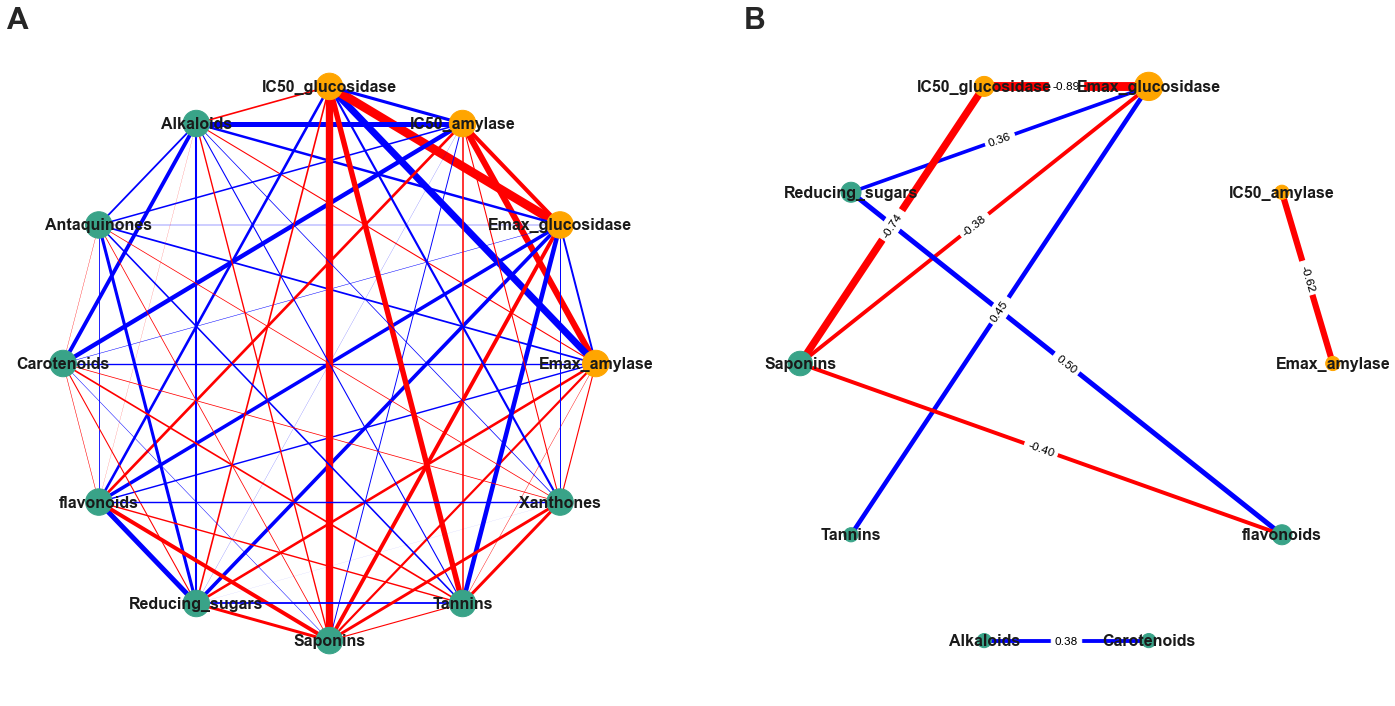

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,10))
fig.tight_layout(w_pad=5,)
texts = ['A', 'B']
axes = fig.get_axes()
for a,l in zip(axes, texts):
    a.annotate(l, xy=(-0.0, 1.0), xycoords="axes fraction", fontsize=30, weight = 'bold')
nx.draw(G0, with_labels=True, node_size=700, node_color=color_map_0, width=edge_width_0,
        edge_color=edge_colors_0,  pos=nx.circular_layout(G0),ax=ax[0], font_weight = 'bold',font_size=16)
nx.draw(Gx, with_labels=True, node_size=node_size,  node_color=color_map, edge_color=edge_colours, 
        width=edge_width, pos=nx.circular_layout(Gx), ax=ax[1], font_weight='bold',font_size=16)
edge_labels = dict([((n1, n2), f"{d['correlation']:.2f}")
                    for n1, n2, d in Gx.edges(data=True)])
nx.draw_networkx_edge_labels(Gx, pos=nx.circular_layout(Gx), edge_labels=edge_labels, 
                             font_color='black', font_size=12, ax=ax[1])

plt.savefig('Network_phytochemical_sig_new.pdf', dpi=500, bbox_inches='tight')
plt.show()